In [34]:
# 导入numpy工具包

In [35]:
import numpy as np

In [36]:
# 初始化一个2*2的线性相关矩阵

In [37]:
M = np.array([[1,2],[2,4]])

In [38]:
# 计算矩阵的秩

In [39]:
np.linalg.matrix_rank(M,tol=None)

1

In [40]:
import pandas as pd

In [41]:
# 使用pandas分别读取训练数据与测试数据集。
digits_train = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/optdigits/optdigits.tra', header=None)
digits_test = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/optdigits/optdigits.tes', header=None)

In [42]:
# 分割训练数据的特征向量和标记

In [43]:
X_digits = digits_train[np.arange(64)]
y_digits = digits_train[64]

In [44]:
# 从sklearn.decomposition 导入PCA

In [45]:
from sklearn.decomposition import  PCA

In [46]:
estimator = PCA(n_components=2)

In [47]:
X_pca=estimator.fit_transform(X_digits)

In [48]:
# 显示这10类手写体数字图片经PCA压缩后的2维空间分布

In [49]:
from matplotlib import pyplot as plt

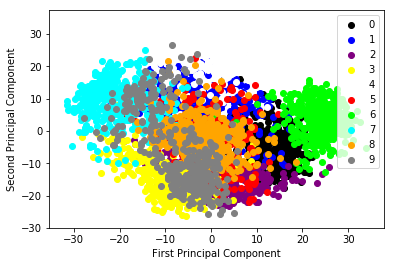

In [53]:
def plot_pca_scatter():
    colors = ['black','blue','purple','yellow','white','red','lime','cyan','orange','gray']
    for i in xrange(len(colors)):
        px = X_pca[:, 0][y_digits.as_matrix() == i]
        py = X_pca[:, 1][y_digits.as_matrix()== i]
        plt.scatter(px,py,c=colors[i])
        
    plt.legend(np.arange(0,10).astype(str))
    plt.xlabel('First Principal Component')
    plt.ylabel('Second Principal Component')
    plt.show()

plot_pca_scatter()

In [54]:
# 对训练数据／测试数据进行特征向量（图片像素）与分类目标的隔离

In [55]:
X_train = digits_train[np.arange(64)]
y_train = digits_train[64]
X_test = digits_test[np.arange(64)]
y_test = digits_test[64]

In [56]:
# 导入基于线性核的支持向量机分类器

In [57]:
from sklearn.svm import LinearSVC

In [58]:
# 初始化线性核的支持向量机的分类器

In [59]:
svc = LinearSVC()

In [60]:
svc.fit(X_train,y_train)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [61]:
y_pred = svc.predict(X_test)

In [62]:
# 使用PCA将原64维德图像压缩为20个纬度

In [63]:
estimator = PCA(n_components=20)

In [64]:
# 利用训练特征决定20个正交纬度的方向，并转化原训练特征
pca_X_train = estimator.fit_transform(X_train)
pca_X_test = estimator.transform(X_test)

In [65]:
# 格式化LinearSVC，对压缩后的数据进行建模，并作出预测

In [66]:
psc_svc = LinearSVC()

In [67]:
psc_svc.fit(pca_X_train,y_train)
pca_y_pred = psc_svc.predict(pca_X_test)

In [69]:
# print pca_y_pred

[0 1 2 ..., 8 9 8]


In [70]:
from sklearn.metrics import classification_report

In [71]:
print svc.score(X_test,y_test)

0.93489148581


In [72]:
print classification_report(y_test,y_pred,target_names=np.arange(10).astype(str))
print psc_svc.score(pca_X_test,y_test)
print classification_report(y_test,pca_y_pred,target_names=np.arange(10).astype(str))

             precision    recall  f1-score   support

          0       0.98      0.98      0.98       178
          1       0.92      0.90      0.91       182
          2       0.96      0.98      0.97       177
          3       0.95      0.92      0.94       183
          4       0.94      0.97      0.95       181
          5       0.90      0.97      0.93       182
          6       0.99      0.98      0.98       181
          7       0.98      0.92      0.95       179
          8       0.85      0.90      0.87       174
          9       0.90      0.84      0.87       180

avg / total       0.94      0.93      0.93      1797

0.925431274346
             precision    recall  f1-score   support

          0       0.97      0.97      0.97       178
          1       0.91      0.80      0.85       182
          2       0.97      0.97      0.97       177
          3       0.97      0.94      0.96       183
          4       0.93      0.97      0.95       181
          5       0.89     